In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [89]:
#from js import fetch
#import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#resp = await fetch(URL)
#boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [90]:
df = pd.read_csv(URL)

# Task 1: Become familiar with the dataset

The following describes the dataset variables:

* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS - proportion of non-retail business acres per town.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX - nitric oxides concentration (parts per 10 million)

* RM - average number of rooms per dwelling

* AGE - proportion of owner-occupied units built prior to 1940

* DIS - weighted distances to five Boston employment centres

* RAD - index of accessibility to radial highways

* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town

* LSTAT - % lower status of the population

* MEDV - Median value of owner-occupied homes in $1000's



In [25]:
df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [5]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [39]:
df['CHAS'].value_counts().to_frame()

,CHAS
0.0,471
1.0,35


In [7]:
df.shape

(506, 14)

In [8]:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a **boxplot**

* Provide a  **bar plot** for the Charles river variable

* Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a **histogram** for the pupil to teacher ratio variable



## Task 2.1

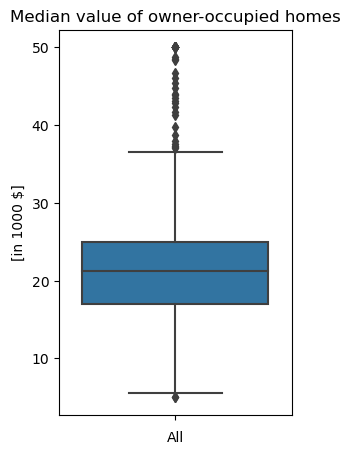

In [19]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(y='MEDV',data=df)
ax.set_title('Median value of owner-occupied homes')
ax.set_xlabel('All')
ax.set_ylabel('[in 1000 $]')
plt.show()

## Task 2.2

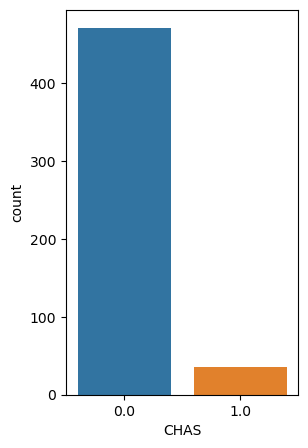

In [49]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x='CHAS',data=df)

## Task 2.3

In [106]:
labels = ['age <= 35', ' 35 < age < 70', 'age >= 70']
df['AGEGRP'] = pd.cut(df['AGE'], bins=np.array([0,35.,70.,999.]), labels=labels, right=False)
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGEGRP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35 < age < 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,age >= 70
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35 < age < 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35 < age < 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35 < age < 70


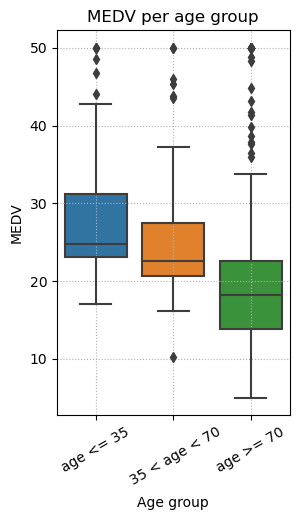

In [111]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(x='AGEGRP',y='MEDV',data=df)
ax.set_title('MEDV per age group')
ax.set_xlabel('Age group')
ax.grid(ls=':')
plt.xticks(rotation=30)
plt.show()

MEDV decreases with increasing age.

## Task 2.4

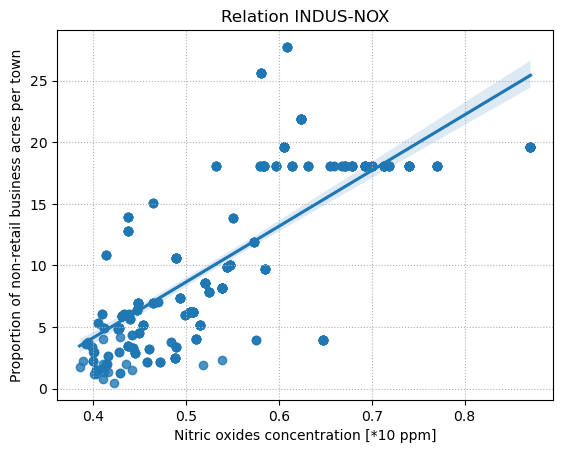

In [60]:
ax = sns.regplot(x='NOX', y='INDUS', data=df)
ax.grid(ls=':')
ax.set_xlabel('Nitric oxides concentration [*10 ppm]')
ax.set_ylabel('Proportion of non-retail business acres per town')
ax.set_title('Relation INDUS-NOX')
plt.show()

## Task 2.5

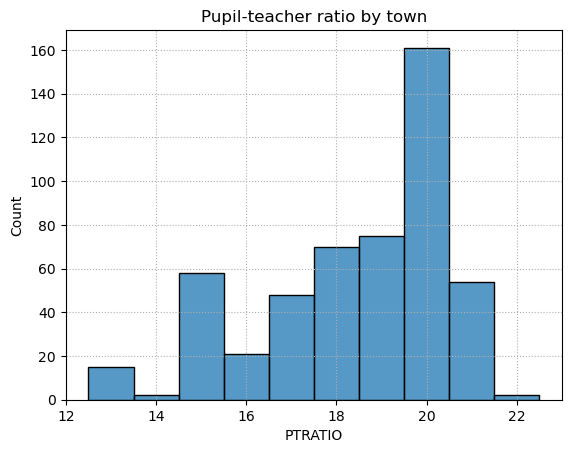

In [82]:
ax = sns.histplot(x='PTRATIO',data=df, bins=np.arange(12.5,23.5,1.0))
ax.set_title('Pupil-teacher ratio by town')
ax.grid(ls=':')
plt.show()

# Task 3: Use the appropriate tests to answer the questions

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

In [113]:
alpha = 0.05

## Task 3.1
H0: There is no difference in the median value of houses bounded by the Charles river and those that are not.

H1: There is a difference.

In [118]:
df.groupby('CHAS').mean()['MEDV']

CHAS
0.0    22.093843
1.0    28.440000
Name: MEDV, dtype: float64

In [114]:
scipy.stats.ttest_ind(df[df['CHAS'] == 1]['MEDV'],df[df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

## Task 3.2
H0: There is no difference in MEDV for each proportion of owner occupied units built prior to 1940.

H1: There is a difference.

In [119]:
lm = ols('MEDV ~ AGE', data=df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


## Task 3.3
H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1: There is a relation between INDUS and NOX.

In [120]:
scipy.stats.pearsonr(df['INDUS'],df['NOX'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

In [121]:
df[['INDUS','NOX']].corr()

,INDUS,NOX
INDUS,1.000000,0.763651
NOX,0.763651,1.000000


## Task 3.4

In [124]:
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)

In [125]:
model = sm.OLS(y,X).fit()
prediction = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        16:13:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""